# Project 6 EDA Notebook

### Jackie Ganyo
## Purpose: Exploratory Data Analysis (EDA) Jupyter Notebook Project

This Jupyter Notebook project aims to perform Exploratory Data Analysis (EDA) on Seaborn's health expenses dataset. The purpose of this project is to gain insights, discover patterns, and identify trends in the data through various statistical and visual exploration techniques. By analyzing the data, we can better understand its characteristics, uncover potential relationships between variables, and make informed decisions for further analysis or modeling.

Please note that this documentation comment is specific to the Jupyter Notebook project mentioned in the filepath provided.


In [386]:
#Import statements for all required libraries
import jupyter
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns
import scipy

#### Load the dataset into a pandas DataFrame -  Seaborn Health Expense set



In [387]:
#Load the healthexp dataset from Seaborn, define it as variable 'df'
df = sns.load_dataset('healthexp')

#Set the theme for the Seaborn plots to dark
sns.set_theme(style="dark")


#### Inspect first rows of the DataFrame


In [388]:
print(df.head())

   Year        Country  Spending_USD  Life_Expectancy
0  1970        Germany       252.311             70.6
1  1970         France       192.143             72.2
2  1970  Great Britain       123.993             71.9
3  1970          Japan       150.437             72.0
4  1970            USA       326.961             70.9


#### Initial Data Inspection

In [389]:
#Display the first 10 rows of the dataset
print(df.head(10))

#Check the shape of the data frame
print(df.shape)

#Check the data types of the columns
print(df.dtypes)

   Year        Country  Spending_USD  Life_Expectancy
0  1970        Germany       252.311             70.6
1  1970         France       192.143             72.2
2  1970  Great Britain       123.993             71.9
3  1970          Japan       150.437             72.0
4  1970            USA       326.961             70.9
5  1971         Canada       313.391             72.8
6  1971        Germany       298.251             70.8
7  1971  Great Britain       134.172             71.9
8  1971          Japan       163.854             72.9
9  1971            USA       357.988             71.2
(274, 4)
Year                 int64
Country             object
Spending_USD       float64
Life_Expectancy    float64
dtype: object


#### Initial Descriptive Statistics

In [390]:
#Run the describe function on the data frame
print(df.describe())

              Year  Spending_USD  Life_Expectancy
count   274.000000    274.000000       274.000000
mean   1996.992701   2789.338905        77.909489
std      14.180933   2194.939785         3.276263
min    1970.000000    123.993000        70.600000
25%    1985.250000   1038.357000        75.525000
50%    1998.000000   2295.578000        78.100000
75%    2009.000000   4055.610000        80.575000
max    2020.000000  11859.179000        84.700000


#### Initial Data Distribution for Numerical Columns

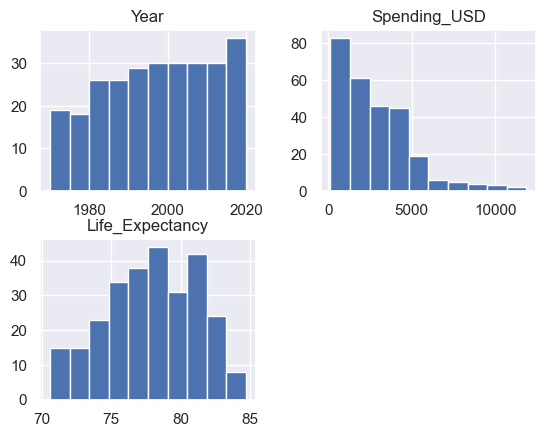

In [391]:
#Inspect histogram by calling the hist function on the data frame
df.hist()

#show the histogram
plt.show()

#### **Initial Data Distribution for Categorial Columns**

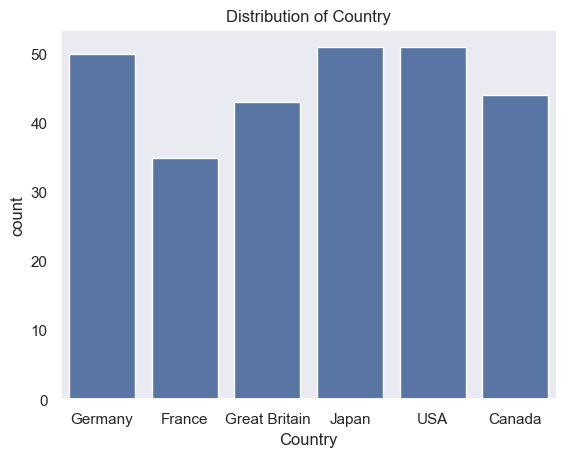

In [392]:
#Inspect value counts for categorical columns
df.value_counts()

#Inspect value counts for Country column
for col in df.select_dtypes(include=['object', 'category']).columns:
    #Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

#Show all plots
plt.show()    

#### **Initial Data Transformation & Feature Engineering**

In [393]:
#Rename at least one column
df.rename(columns={'Spending_USD':"Expense_USD"}, inplace=True)

#Add at least one column
df['Expense_per_Life_Expectancy'] = df['Expense_USD'] / df['Life_Expectancy']

#Display the first rows of the dataset to show changes made
print(df.head())

   Year        Country  Expense_USD  Life_Expectancy  \
0  1970        Germany      252.311             70.6   
1  1970         France      192.143             72.2   
2  1970  Great Britain      123.993             71.9   
3  1970          Japan      150.437             72.0   
4  1970            USA      326.961             70.9   

   Expense_per_Life_Expectancy  
0                     3.573810  
1                     2.661260  
2                     1.724520  
3                     2.089403  
4                     4.611580  


##### **Impressions based on histograms and initial stats:** 
1. Six countries are representing in the healthexp dataset:  Germany, Japan, USA, Canada, Great Britain, and France.
1. Three countries are represented with 50 entries-spanning years from 1970 through 2020:  Germany, Japan, and USA.  
1. Spending_USD is left skewed meaning the majority of the data points fall at the lower end with a outliers very high above the rest.  Most of the datapoints appear below $5,000.
1. The histogram for Life_Expectancy shows a normal distribution with peaks at or slightly above the average (77.9).

#### Initial Visualizations
Create a variety of chart types using seaborn and matplotlib to showcare different aspects of health expenses data. Include the goal for each chart-what you want to learn/explore, the type of chart your choose, display the chart, and tell your data story.  
Intuitively, one would think spending more on health would result in higher life expectancies. The goal for this initial set of visualizations is to determine if there is a relationship between amount of money spent and life expectancy. Secondly, does increased health sector spending equate to higher life expectancies. 

##### **Goal:** Determine if there is a correlation between health expense and life expectancy. 

##### **Chart type:** Scatterplot of money spent and life expectancy.


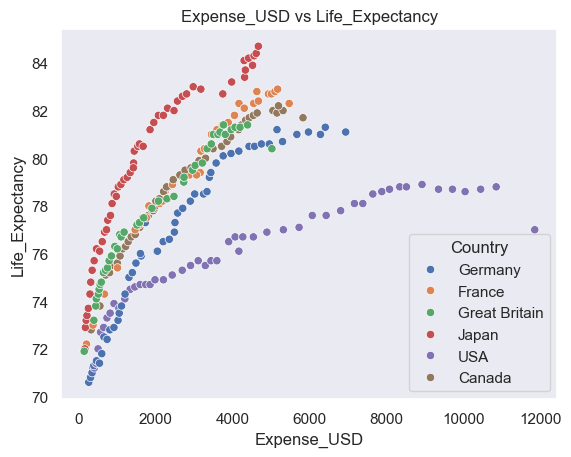

In [394]:
sns.scatterplot(
    data=df,
    
    x="Expense_USD", 
    y="Life_Expectancy",
    hue="Country"
)
plt.title('Expense_USD vs Life_Expectancy')
plt.show()


##### **Impressions:** 
1.  The USA & Germany are the only two countries with data points beginning in 1970.  
1.  A positive correlation is seen between expense and life expectancy for all countries.  However, this scatterplot brings forth an alarming trend after a given expenditure value and/or life expectancy.
1.  The USA's data shows large gains in life expenctancy through $2,000 mark and then gains in life expectancy significantly decrease suggesting that expenditures in health are not the only factor influencing life expectency.  

##### **Goal:** Determine what each country's life expectancy data looks like with average (mean) and quartile markings included. 
##### **Chart Type:**  
1. Violin plot that also contains marks for the average life expectancy and the upper and lower quartiles visualized (all by country). 
2. Swarm plot to visualize any clusters of data within each Country's life expectancy. 

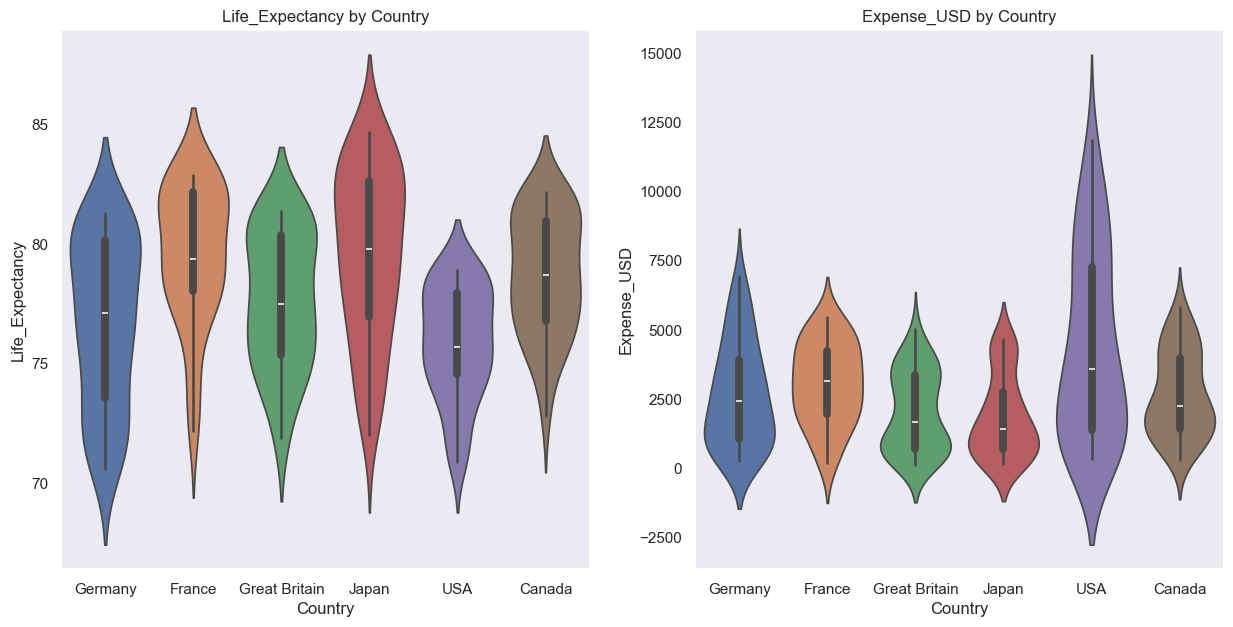

<Figure size 700x700 with 0 Axes>

In [395]:
#Violin plot to show low, high, average and upper and lower quartile values by country 
# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

plt.figure(figsize=(7,7))

sns.violinplot(
    y="Life_Expectancy",
    x="Country",
    hue="Country",
    data=df,
    ax=axes[0]
    )

axes[0].set_title('Life_Expectancy by Country')

sns.violinplot(
    y='Expense_USD',
    x='Country',
    hue='Country',
    data=df, 
    ax=axes[1]
)
axes[1].set_title('Expense_USD by Country')
plt.show()

[Text(-24.375, 0.5, '')]

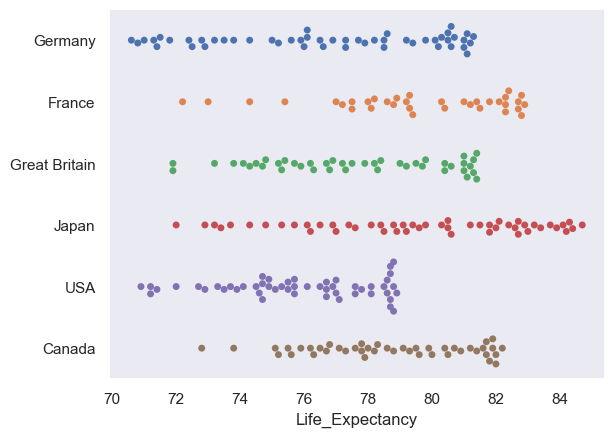

In [396]:
#Swarm plot:  Input a secondary visualization to see if it clarifies some of the information from violin plot.  Identify clusters of data. 

ax = sns.swarmplot(data=df, x="Life_Expectancy", y="Country", hue="Country")
ax.set(ylabel="")


#### **Impressions based upon Violin plot and Swarm plot**
1. USA has the lowest life expectancy 

##### Goal:
##### Chart Type: 

In [397]:
#Third visualization